# The dataset

Dataset yang digunakan merupakan data book-crossing yang terdiri dari tiga file dalam ekstensi CSV yaitu:
1. BX-Users.csv
2. BX-Books.csv
3. BX-Book-Ratings.csv

In [208]:
#Loading neccesary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import sys
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [209]:
#Load dataset from bookcrossing
users = pd.read_csv("./BX-Book/BX-Users.csv", names=['User-ID', 'Location', 'Age'], encoding='latin-1', skiprows=1)
books = pd.read_csv("./BX-Book/BX-Books.csv", names=['ISBN', 'Book-Title' ,'Book-Author','Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L'], encoding='latin-1', skiprows=1)
ratings = pd.read_csv("./Bx-Book/BX-Book-Ratings.csv", names=['User-ID', 'ISBN', 'Book-Rating'], encoding='latin-1', skiprows=1)

In [210]:
#Print users header
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [211]:
#Print users tail
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [212]:
#Print books header
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [213]:
#Print books tail
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [214]:
#Print ratings header
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [215]:
#Print ratings tail
ratings.tail()

,User-ID,ISBN,Book-Rating
1048570,250764,0451410777,0
1048571,250764,0452264464,8
1048572,250764,048623715X,0
1048573,250764,0486256588,0
1048574,250764,0515069434,0


In [216]:
#Print books info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-Url-S          271379 non-null  object
 6   Image-Url-M          271379 non-null  object
 7   Image-Url-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [217]:
#Print users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [218]:
#Print ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [219]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [220]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [221]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-Url-S',
       'Image-Url-M', 'Image-Url-L'],
      dtype='object')

In [222]:
print("Dataset memiliki {} rows dan {} columns".format(data.shape[0], data.shape[1]))

Dataset memiliki 940674 rows dan 12 columns


In [223]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


# Data Cleaning

In [224]:
data.drop(['Image-Url-S','Image-Url-M','Image-Url-L'],axis=1,inplace=True)

In [225]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


# Pengecekan Data yang hilang atau missing data

In [226]:
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [227]:
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data
Age,255392,27.149895


In [228]:
print('Data yang hilang atau missing data')
round(data.isnull().sum() / len(data) * 100, 4)

Data yang hilang atau missing data


User-ID                 0.0000
ISBN                    0.0000
Book-Rating             0.0000
Location                0.0000
Age                    27.1499
Book-Title              0.0000
Book-Author             0.0001
Year-Of-Publication     0.0000
Publisher               0.0002
dtype: float64

# Replace Nilai NaN pad Data Age

In [229]:
age = data['Age']
mean_age = age.mean()
median_age = age.median()

In [230]:
mean_age

37.680417696656264

In [231]:
median_age

36.0

In [232]:
round(mean_age)

38

In [233]:
mean_age = round(mean_age)

In [234]:
age.fillna(value = median_age, inplace = True)

In [235]:
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [236]:
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data


In [237]:
print('Data yang hilang atau missing data')
round(data.isnull().sum() / len(data) * 100, 4)

Data yang hilang atau missing data


User-ID                0.0000
ISBN                   0.0000
Book-Rating            0.0000
Location               0.0000
Age                    0.0000
Book-Title             0.0000
Book-Author            0.0001
Year-Of-Publication    0.0000
Publisher              0.0002
dtype: float64

In [238]:
print('Rata-rata rating buku: ', round(data['Book-Rating'].mean()))

Rata-rata rating buku:  3


In [239]:
print('Rata-rata rating buku: ', round(data['Book-Rating'].mean(), 5))

Rata-rata rating buku:  2.85124


# Prepare Dataset

In [240]:
country = data['Location'].apply(lambda row: str(row).split(',')[-1])
data.groupby(country)['Book-Rating'].count().sort_values(ascending=False).head(10)

Location
 usa               681107
 canada             83752
 united kingdom     30527
                    22178
 germany            20912
 australia          16276
FALSE               12900
 n/a                11177
 spain              10473
 france              8457
Name: Book-Rating, dtype: int64

In [241]:
Age = data['Age'].apply(lambda row: str(row).split(',')[-1])
data.groupby(Age)['Book-Rating'].count().sort_values(ascending=False).head(15)

Age
36.0    279996
29.0     28937
33.0     27440
30.0     25176
28.0     24995
31.0     23741
34.0     22996
32.0     21669
38.0     21162
44.0     20563
43.0     20110
27.0     19894
26.0     19754
37.0     19430
25.0     18180
Name: Book-Rating, dtype: int64

C:\Users\Lenovo\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

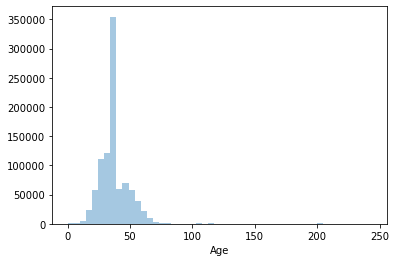

In [242]:
sns.distplot(data['Age'].dropna(), kde=False)

In [243]:
print('Jumlah outliers: ', sum(data['Age'] > 100))

Jumlah outliers:  2767


In [244]:
print('Jumlah pengguna: ',data['User-ID'].nunique())

Jumlah pengguna:  83600


In [245]:
print('Jumlah buku: ', data['ISBN'].nunique())

Jumlah buku:  257824


In [246]:
print('Jumlah outliers: ', sum(data['Book-Rating'] > 1))

Jumlah outliers:  350306


In [247]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

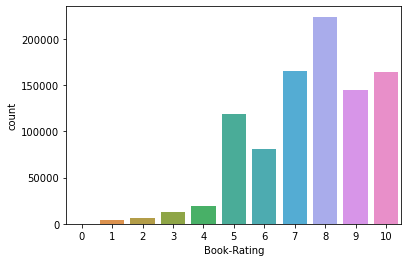

In [248]:
sns.countplot(x='Book-Rating', data=data)

In [249]:
print('Rata-rata rating buku: ', round(data['Book-Rating'].mean(), 5))

Rata-rata rating buku:  7.55243


In [250]:
data.describe()

,User-ID,Book-Rating,Age,Year-Of-Publication
count,940674.000000,940674.000000,940674.000000,940674.000000
mean,128780.767922,7.552435,37.224186,1968.208473
std,74245.052739,1.855537,12.145132,231.011484
min,2.000000,0.000000,0.000000,0.000000
25%,63426.750000,6.000000,31.000000,1992.000000
50%,128835.000000,8.000000,36.000000,1997.000000
75%,193560.000000,9.000000,41.000000,2001.000000
max,278854.000000,10.000000,244.000000,2050.000000


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940674 entries, 0 to 940673
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              940674 non-null  int64  
 1   ISBN                 940674 non-null  object 
 2   Book-Rating          940674 non-null  int64  
 3   Location             940674 non-null  object 
 4   Age                  940674 non-null  float64
 5   Book-Title           940674 non-null  object 
 6   Book-Author          940673 non-null  object 
 7   Year-Of-Publication  940674 non-null  int64  
 8   Publisher            940672 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 111.8+ MB


In [252]:
data['Book-Rating'].describe()

count    940674.000000
mean          7.552435
std           1.855537
min           0.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [253]:
data['Age'] = np.where(data['Age']>90, None, data['Age'])

In [255]:
data['Year-Of-Publication'] = np.where(data['Year-Of-Publication']>2004, None, data['Year-Of-Publication'])

In [256]:
data['Year-Of-Publication'] = np.where(data['Year-Of-Publication']<1980, None, data['Year-Of-Publication'])

C:\Users\Lenovo\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year-Of-Publication'>

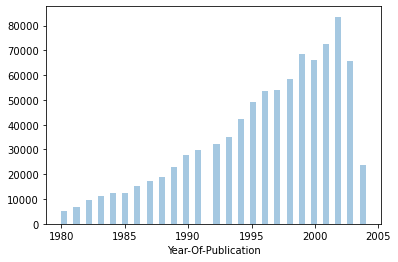

In [262]:
sns.distplot(data['Year-Of-Publication'].dropna(), kde=False)